### Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/healthcare_analytics_dataset.csv")

# Preview target column
df["readmitted_within_30_days"].value_counts()

readmitted_within_30_days
No     460
Yes     40
Name: count, dtype: int64

### Select Features for Modeling

In [2]:
features = [
    "age",
    "gender",
    "doctor_specialty",
    "length_of_stay",
    "bed_ward",
    "insurance_status",
    "satisfaction_score",
    "doctor_rating",
]

df_model = df[features + ["readmitted_within_30_days"]].dropna()
df_model.head()

,age,gender,doctor_specialty,length_of_stay,bed_ward,insurance_status,satisfaction_score,doctor_rating,readmitted_within_30_days
0,4,Other,Cardiology,3,ICU,Uninsured,1,2,Yes
1,26,Other,Oncology,7,Surgery,Uninsured,6,2,No
2,13,Female,Pulmonology,13,Surgery,Uninsured,10,3,No
3,6,Other,Pulmonology,2,ICU,Private,6,3,No
4,69,Other,Endocrinology,7,General,Uninsured,1,4,No


### Encode Categorical Features

In [3]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_model.copy()
le = LabelEncoder()

# Encode categorical columns
for col in ["gender", "doctor_specialty", "bed_ward", "insurance_status"]:
    df_encoded[col] = le.fit_transform(df_encoded[col])

### Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns="readmitted_within_30_days")
y = df_encoded["readmitted_within_30_days"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Train Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Classification Report:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96        92
         Yes       0.00      0.00      0.00         8

    accuracy                           0.92       100
   macro avg       0.46      0.50      0.48       100
weighted avg       0.85      0.92      0.88       100

✅ Confusion Matrix:
 [[92  0]
 [ 8  0]]


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### Visualize Feature Importance

C:\Users\HP\AppData\Local\Temp\ipykernel_15316\2415121894.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feat_df, palette="viridis")


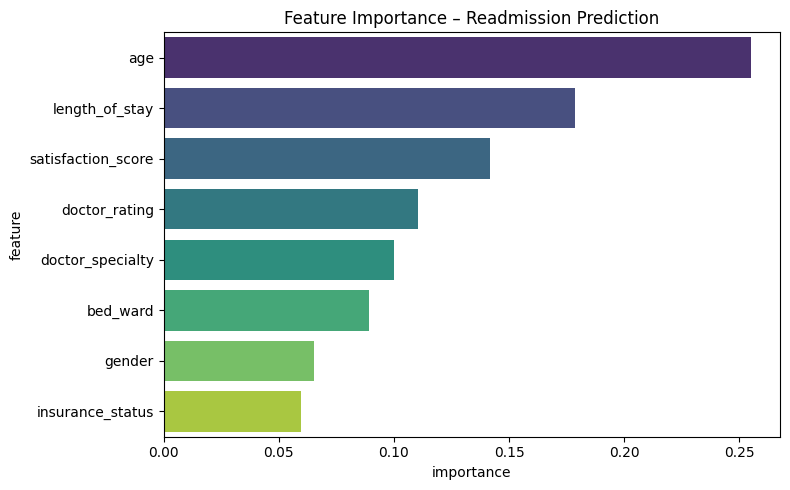

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../visuals/plots", exist_ok=True)

importances = clf.feature_importances_
feat_df = pd.DataFrame({"feature": X.columns, "importance": importances})
feat_df = feat_df.sort_values("importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="feature", data=feat_df, palette="viridis")
plt.title("Feature Importance – Readmission Prediction")
plt.tight_layout()
plt.savefig("../visuals/plots/readmission_feature_importance.png")
plt.show()

### Export Predictions for Power BI

In [7]:
X_test["actual"] = y_test.values
X_test["predicted"] = y_pred

X_test.to_csv("../data/processed/cleaned/readmission_predictions.csv", index=False)
print("✅ Predictions exported to /data/processed/cleaned")

✅ Predictions exported to /data/processed/cleaned
